### Problem statement:-
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

import math
import statsmodels.api as stm
import warnings
warnings.filterwarnings("ignore")


# **Reading and Understanding Data**

In [9]:
tel_df=pd.read_csv('telecom_churn_data.csv')

In [10]:
#Identifying the head of the data set
tel_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [11]:
# Identifying the dimensions of the dataset
tel_df.shape

(99999, 226)

In [12]:
# Describing the data set
tel_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


The variables circle-id, loc_og_t2o_mou,std_og_t2o_mou and loc_ic_t2o_mou have same minimum and maximum value with 0 standard deviation. This implies that they have a single unique value and hence these columns can be dropped. Other columns with a single unique value should also be dropped

In [13]:
# Drop columns which has only 1 unique values
tel_df.drop(['circle_id', 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)
tel_df.shape

(99999, 222)

In [14]:
# Finding other columns that have a single unique value
uniq_col= tel_df.columns[tel_df.nunique()==1]
tel_df.drop(uniq_col,axis=1,inplace=True)
tel_df.shape

(99999, 210)

In [15]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: float64(168), int64(34), object(8)
memory usage: 160.2+ MB


From the above information, it is clear that there are 8 object columns, 34 integer columns and 168 float columns. They are explored in order

# **Understanding object variables**

In [16]:
# Selecting only columns which Object Datatype
obj_col=tel_df.select_dtypes(['object']).columns.tolist()
obj_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [17]:
tel_df[obj_col].describe()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,98392,98232,96377,95239,25153,25571,26339,25922
unique,30,31,31,30,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,16960,17288,14706,22623,1888,1813,1998,2329


In [18]:
# Checking the missing value percentage for Date columns
round(100*tel_df[obj_col].isnull().sum()/len(tel_df),1)

date_of_last_rech_6          1.6
date_of_last_rech_7          1.8
date_of_last_rech_8          3.6
date_of_last_rech_9          4.8
date_of_last_rech_data_6    74.8
date_of_last_rech_data_7    74.4
date_of_last_rech_data_8    73.7
date_of_last_rech_data_9    74.1
dtype: float64

In [19]:
# Missing values may imply that the user haven't recharged in that  month. Columns with more tan 70 % recharge values are dropped 
tel_df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1,inplace=True)
tel_df.shape 

(99999, 206)

In [20]:
#Now the other date columns have to be convereted to datetime type
tel_df['date_of_last_rech_6']=pd.to_datetime(tel_df['date_of_last_rech_6'])
tel_df['date_of_last_rech_7']=pd.to_datetime(tel_df['date_of_last_rech_7'])
tel_df['date_of_last_rech_8']=pd.to_datetime(tel_df['date_of_last_rech_8'])
tel_df['date_of_last_rech_9']=pd.to_datetime(tel_df['date_of_last_rech_9'])
tel_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,2014-06-21,2014-07-16,2014-08-08,2014-09-28
1,2014-06-29,2014-07-31,2014-08-28,2014-09-30
2,2014-06-17,2014-07-24,2014-08-14,2014-09-29
3,2014-06-28,2014-07-31,2014-08-31,2014-09-30
4,2014-06-26,2014-07-28,2014-08-09,2014-09-28


In [21]:
# Selecting only DateTime Columns
tel_df.select_dtypes(include='datetime').columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

# **Understanding numeric variables**

In [22]:
# Selecting all numeric value columns
num_col=tel_df.select_dtypes(include= np.number).columns.tolist()
num_col

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [23]:
# Convert mobile number to object
tel_df['mobile_number']=tel_df['mobile_number'].astype('object')
tel_df['mobile_number'].head()

0    7000842753
1    7001865778
2    7001625959
3    7001204172
4    7000142493
Name: mobile_number, dtype: object

In [24]:
# Understanding the missing value % for all numeric columns
pd.set_option('display.max_rows', None) 
round(100*tel_df[num_col].isnull().sum()/len(tel_df),1)

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
arpu_9                 0.0
onnet_mou_6            3.9
onnet_mou_7            3.9
onnet_mou_8            5.4
onnet_mou_9            7.7
offnet_mou_6           3.9
offnet_mou_7           3.9
offnet_mou_8           5.4
offnet_mou_9           7.7
roam_ic_mou_6          3.9
roam_ic_mou_7          3.9
roam_ic_mou_8          5.4
roam_ic_mou_9          7.7
roam_og_mou_6          3.9
roam_og_mou_7          3.9
roam_og_mou_8          5.4
roam_og_mou_9          7.7
loc_og_t2t_mou_6       3.9
loc_og_t2t_mou_7       3.9
loc_og_t2t_mou_8       5.4
loc_og_t2t_mou_9       7.7
loc_og_t2m_mou_6       3.9
loc_og_t2m_mou_7       3.9
loc_og_t2m_mou_8       5.4
loc_og_t2m_mou_9       7.7
loc_og_t2f_mou_6       3.9
loc_og_t2f_mou_7       3.9
loc_og_t2f_mou_8       5.4
loc_og_t2f_mou_9       7.7
loc_og_t2c_mou_6       3.9
loc_og_t2c_mou_7       3.9
loc_og_t2c_mou_8       5.4
loc_og_t2c_mou_9       7.7
l

In [25]:
# Columns with more than 70 % misisng values are dropped excluding columns corresponding to total_rech_data_* and av_rech_amt_data_*
col_to_drop=tel_df.columns[round(100*tel_df.isnull().sum()/len(tel_df),2)> 70]
data_col=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_6','av_rech_amt_data_9']
col_to_drop=[col for col in col_to_drop if col not in data_col]
tel_df.drop(col_to_drop,axis=1,inplace=True)
tel_df.shape

(99999, 177)

In [26]:
# Intuitively missing values are because, the user has not recharged in the months under consideration.
# Based on this assumption, all the mentioned variables excpet date are imputed with '0' function ot impute values
def impute(*args):
  for col in args:
    tel_df[col].fillna(0,inplace=True)

    
num_col=tel_df.select_dtypes(include= np.number).columns.tolist()
impute(*num_col)

In [27]:
# Checking the missing value % again
col=tel_df.columns[tel_df.isnull().any()].tolist()
round(100*tel_df[col].isnull().sum()/len(tel_df),2)

date_of_last_rech_6    1.61
date_of_last_rech_7    1.77
date_of_last_rech_8    3.62
date_of_last_rech_9    4.76
dtype: float64

Date columns are not imputed as the chances are that the person has not recharged in that month

In [28]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 177 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(139), int64(33), object(1)
memory usage: 135.0+ MB


# **Data Preparation**

## **Derive new features**

In [29]:
# Calcuating the Average recharge amount as the sum of total recharge amount and the total data recharge amount
# Total data recharge is calculated as the product of total number of data recharge & Average data recharge amount
tel_df['avg_total_rech_amt_67']=(tel_df['total_rech_amt_6']+tel_df["total_rech_data_6"]*tel_df['av_rech_amt_data_6']+
                                 tel_df['total_rech_amt_7']+tel_df["total_rech_data_7"]*tel_df['av_rech_amt_data_7'])/2


In [30]:
# Since our High value customers are determined based on average recharge value for month 6 & 7, 
# We are Creating average column for all attributes of Month 6 and 7

mth67_col_list = tel_df.select_dtypes(include=['int64','float64']).filter(regex='_6$|_7$').columns.str[:-2]
mth67_col_list_unq = list(mth67_col_list.unique())
mth67_col_list_unq.remove('total_rech_amt')
print(mth67_col_list_unq)

for col in mth67_col_list_unq:
  avg_col_nm = 'avg_'+col+'_67'
  tel_df[avg_col_nm] = (tel_df[col+'_6'] + tel_df[col+'_7'])/2

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g']


In [31]:
# since average column is created, dropping actual month 6 & 7 columns

tel_df.drop(tel_df.select_dtypes(include=['int64','float64']).filter(regex='_6$|_7$').columns,axis=1,inplace=True)
tel_df.shape

(99999, 135)

# **Filter high value customers**

In [32]:
q=tel_df['avg_total_rech_amt_67'].quantile(.7)
df=tel_df[tel_df['avg_total_rech_amt_67']>=q]
df.shape

(30001, 135)

# **Tag churners and remove attributes of the churn phase**

In [33]:
#Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
# The attributes you need to use to tag churners are: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

def churn_def(row):
    if (row['total_ic_mou_9']==0) & (row['total_og_mou_9']==0) &(row['vol_2g_mb_9']==0) & (row['vol_3g_mb_9']==0):
        return 1
    else: return 0

In [34]:
df['Churn']=df.apply(churn_def,axis=1)
df.head()

,mobile_number,arpu_8,arpu_9,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,...,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,Churn
0,7000842753,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,252.0,1.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,1
7,7000701601,3171.480,500.000,52.29,0.00,325.91,0.00,31.64,0.0,38.06,...,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1
8,7001524846,137.362,166.787,35.08,33.46,136.48,108.71,0.00,0.0,0.00,...,25.0,1.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,0
21,7002124215,637.760,578.596,85.14,161.63,983.39,869.89,0.00,0.0,0.00,...,25.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0
23,7000887461,366.966,811.480,33.58,15.74,205.89,111.88,0.00,0.0,0.00,...,89.5,1.0,178.0,0.240,299.545,0.0,0.0,1.0,0.0,0


In [35]:
# checking the percentage of churned customers
round(100*df['Churn'].sum()/len(df),2)

8.14

In [36]:
# Droping all features which are corresponding to the churn phase
col_9=[col for col in df.columns if '_9' in col]
df.drop(col_9,axis=1, inplace=True)
df.shape

(30001, 93)

In [37]:
# Droping date columns as they are not useful in model building
date_col=[col for col in df.columns if 'date' in col]
df.drop(date_col,axis=1,inplace=True)
df.shape

(30001, 90)

# **EDA**

## **Bar Chart**

In [38]:
import math
def func_bar(*args,data_df):                        
    m=math.ceil(len(args)/2)  # getting the length of arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 6*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.countplot(x=col, data=data_df,ax=ax_li[i], order = data_df[col].value_counts().index)
        ax_li[i].set_title(col)
        ax_li[i].set_yscale('log')
        plt.tight_layout()
        i=i+1

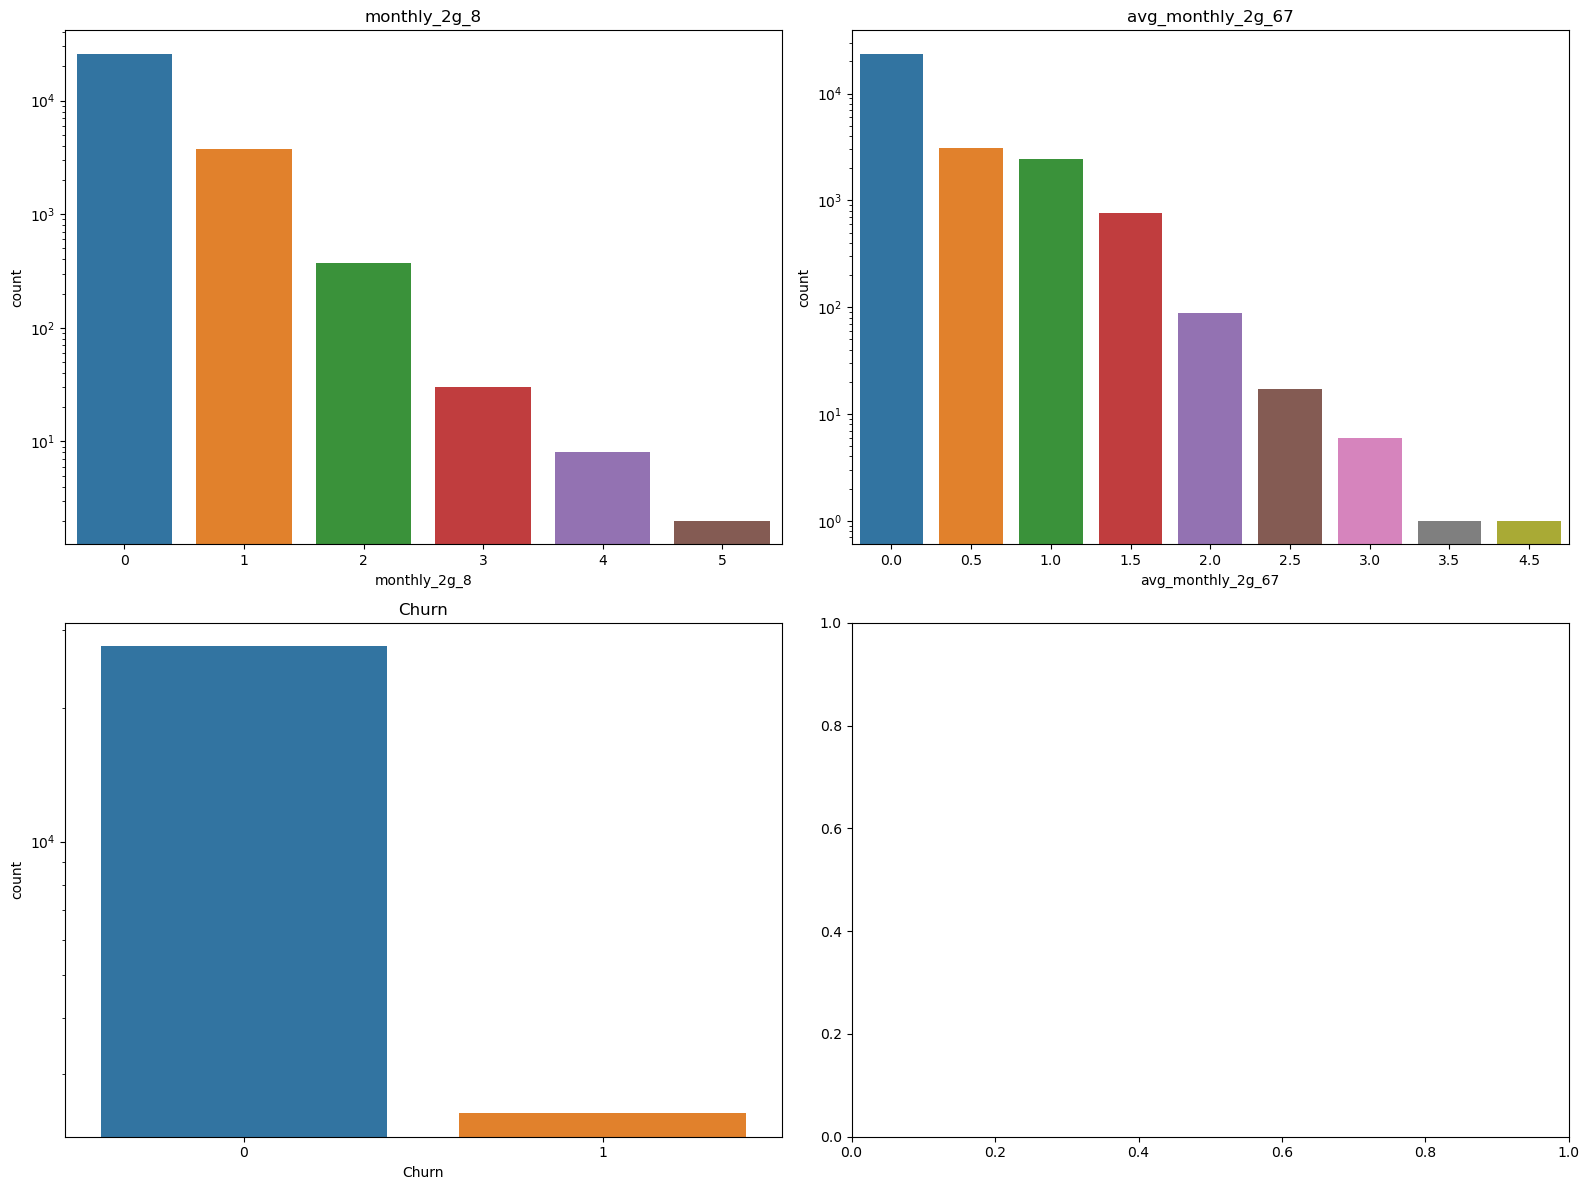

In [39]:
# Plotting Bar chart for data attributes
col_10=df.columns[df.nunique()<=10].tolist()  # Selecting columns that have less than 11 unique values for plotting using barchart
func_bar(*col_10,data_df=df)

## **Box plot**

In [40]:
#function for box plot
def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        
        sns.boxplot(col, data, ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        #ax_li[i].set_xscale('log')
        plt.tight_layout()
        i=i+1

In [41]:
# plotting the distribution for recharge amount 
col_rech = [col for col in df.columns if 'rech' in col]
col_rech

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'total_rech_data_8',
 'avg_total_rech_amt_67',
 'avg_total_rech_num_67',
 'avg_max_rech_amt_67',
 'avg_total_rech_data_67',
 'avg_av_rech_amt_data_67']

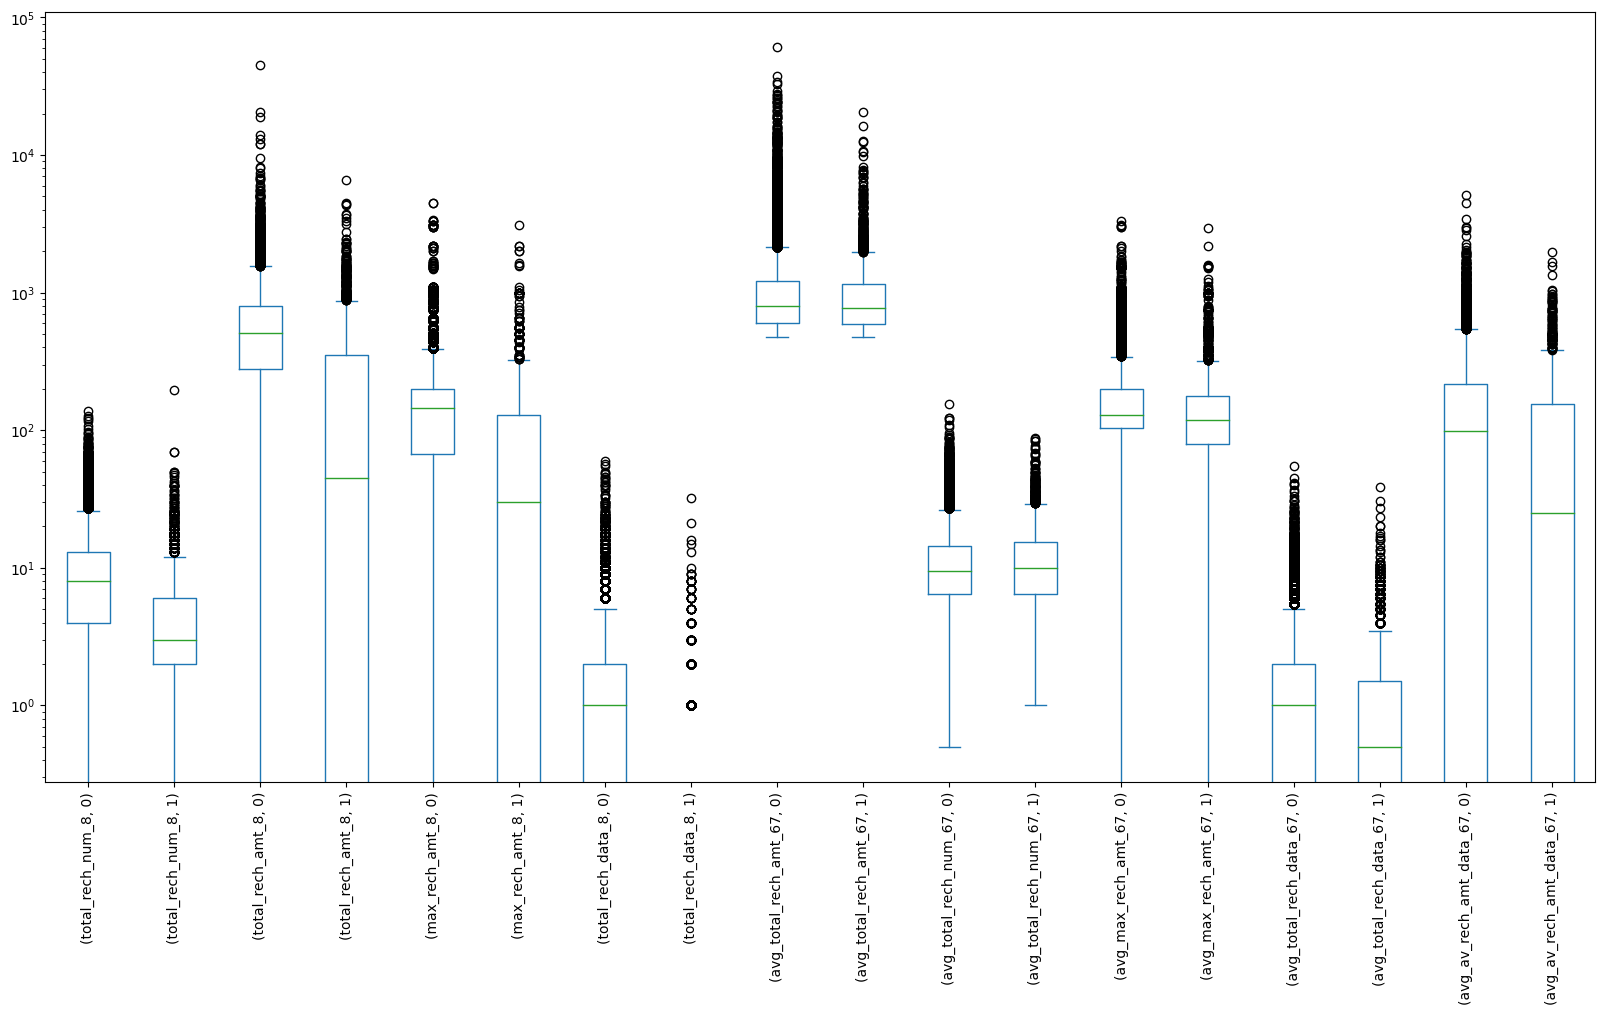

In [42]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_rech].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

In [43]:
# Checking the data distribution of each attibute across multiple percentiles
df[col_rech].describe(percentiles=[.75,0.9,0.99,0.999,0.9999,.99999])

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,total_rech_data_8,avg_total_rech_amt_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,9.972868,584.365454,160.144462,1.621913,1152.620628,11.784924,170.743275,1.760758,135.218053
std,9.274370,611.245907,173.207799,2.996010,1358.713982,8.634676,154.193137,2.706465,182.000971
min,0.000000,0.000000,0.000000,0.000000,478.000000,0.500000,0.000000,0.000000,0.000000
50%,8.000000,490.000000,130.000000,1.000000,800.000000,9.500000,128.000000,1.000000,92.000000
75%,13.000000,776.000000,198.000000,2.000000,1208.000000,14.500000,200.000000,2.000000,210.500000
90%,21.000000,1148.000000,252.000000,5.000000,1991.500000,22.000000,300.000000,5.000000,314.000000
99%,45.000000,2341.000000,951.000000,13.000000,6090.500000,44.500000,799.500000,12.000000,782.000000
99.9%,75.000000,5021.000000,2000.000000,28.000000,17408.500000,74.000000,1555.000000,23.500000,1638.000000
99.99%,122.000000,14000.000000,3299.000000,50.000000,32593.500000,118.000000,3010.000000,40.500000,2982.000000


Clearly there are outliers in the data that has to be removed. Outliers beyound 99.99 percentile are removed.

In [44]:
q=df['total_rech_amt_8'].quantile(0.9999) 
df=df[df['total_rech_amt_8']<=q]
df.shape

(29997, 90)

In [45]:
# Checking for highly correlated columns
# function to eliminate redundant pairs
def redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()   # to ensure that duplicate pairs are not present
    cols = df.columns       # getting list of all solumns in dataframe  
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# function to get highly correlated pairs
def get_top_abs_correlations(df, n):     
    cor = df.corr().abs().unstack()  # getting the absolute value of all correlation coefficienrs
    labels_to_drop = redundant_pairs(df)
    cor = cor.drop(labels=labels_to_drop).sort_values(ascending=False)
    return cor[0:n]

In [46]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_rech],10))


Top Absolute Correlations
total_rech_num_8        avg_total_rech_num_67      0.717505
total_rech_data_8       avg_total_rech_data_67     0.702747
max_rech_amt_8          avg_max_rech_amt_67        0.648081
avg_total_rech_amt_67   avg_av_rech_amt_data_67    0.632790
                        avg_total_rech_data_67     0.615741
total_rech_amt_8        max_rech_amt_8             0.532138
total_rech_data_8       avg_total_rech_amt_67      0.430680
total_rech_num_8        total_rech_amt_8           0.408284
avg_total_rech_data_67  avg_av_rech_amt_data_67    0.401791
total_rech_num_8        total_rech_data_8          0.327460
dtype: float64


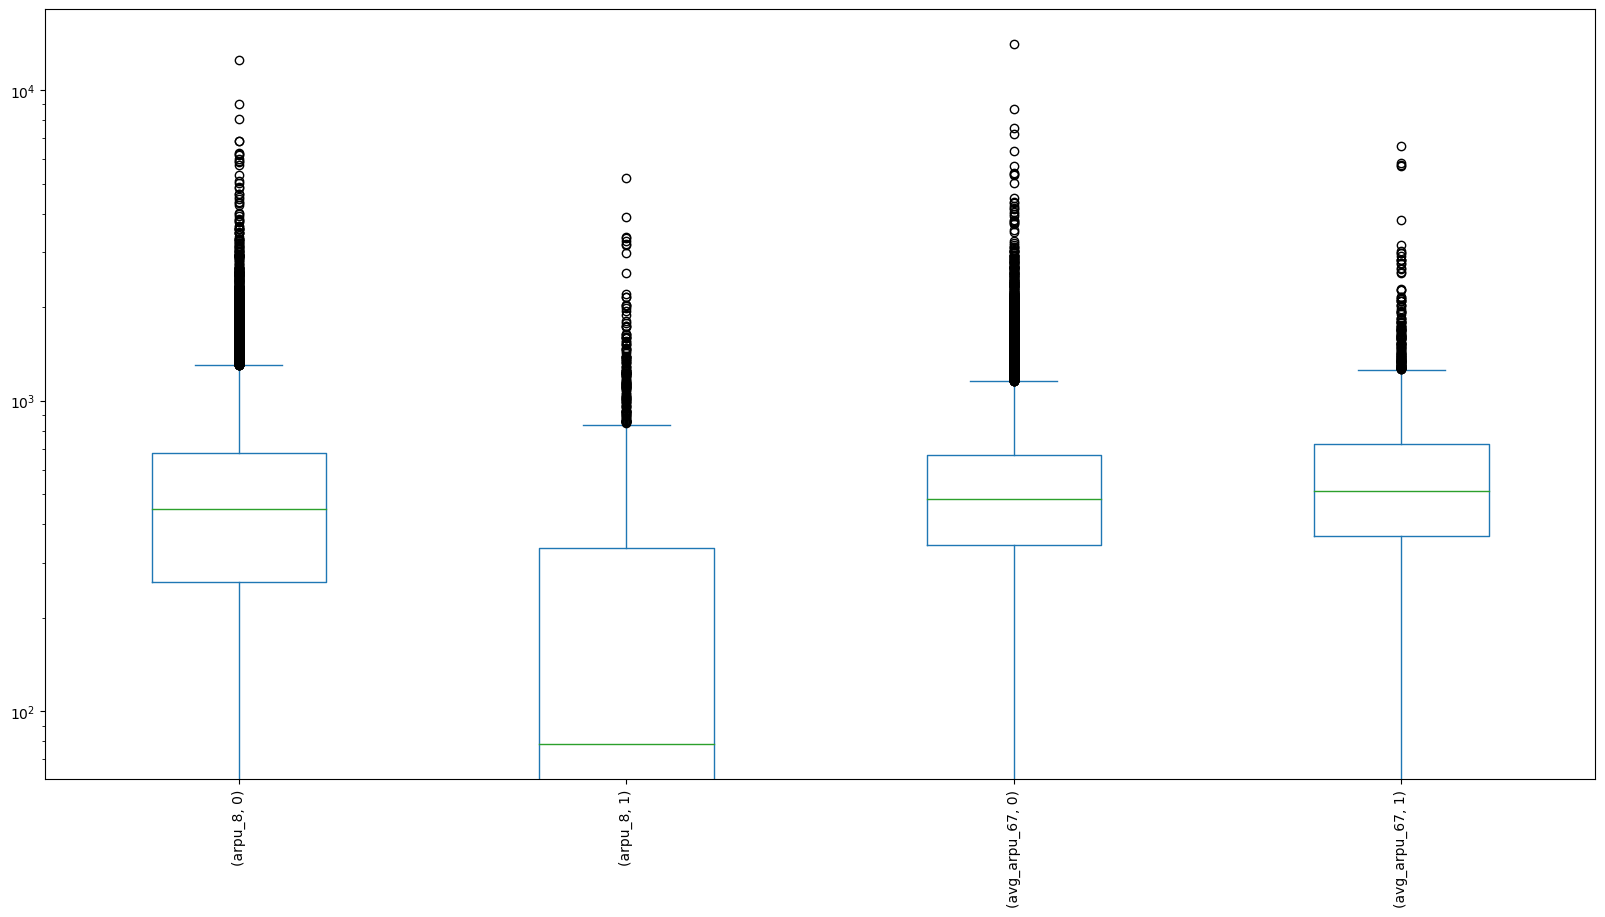

In [47]:
#Columns with correlation more than 75% will be dropped
# plotting the distribution for arpu
col_arpu= [col for col in df.columns if 'arpu' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_arpu].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

Clearly, the ARPU decreases for churned customers for the 8th month

In [48]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_arpu],4))

Top Absolute Correlations
arpu_8  avg_arpu_67    0.688261
dtype: float64


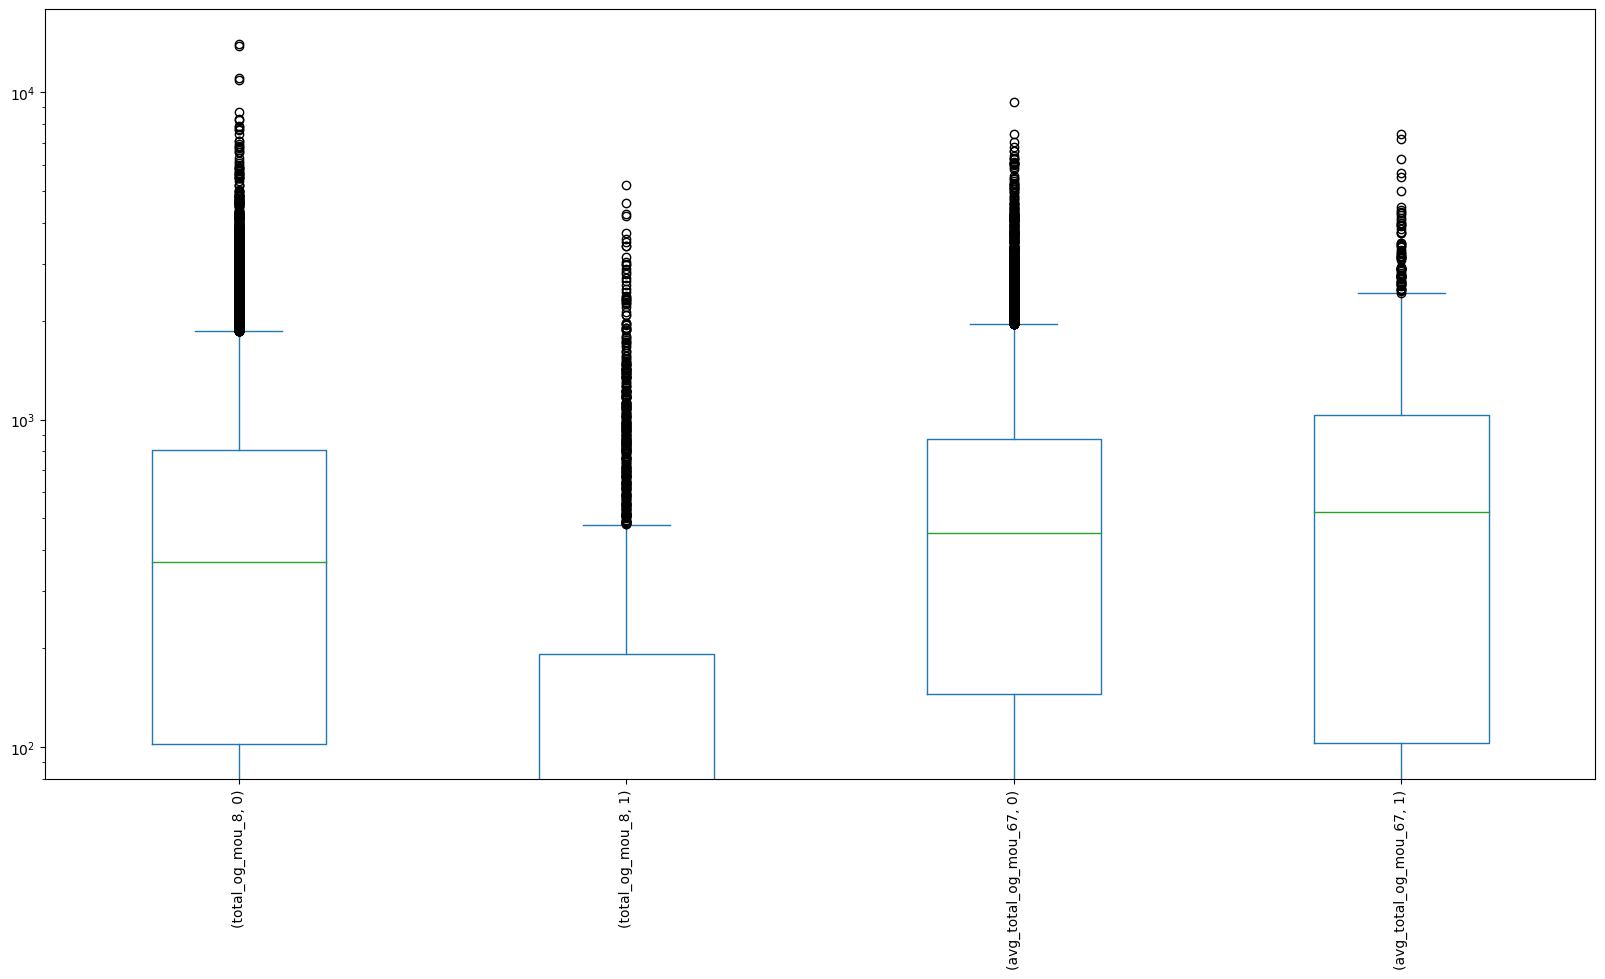

In [49]:
# plotting the distribution for outgoing calls
col_og = [col for col in df.columns if 'total_og' in col]
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_og].plot(kind = 'box',ax=ax)
ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

The total outgoing calls decreases for the churned customers

In [50]:
og = [col for col in df.columns if 'og' in col]
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[og],30))

Top Absolute Correlations
std_og_mou_8           total_og_mou_8           0.852557
avg_std_og_mou_67      avg_total_og_mou_67      0.835188
loc_og_mou_8           avg_loc_og_mou_67        0.824565
loc_og_t2t_mou_8       avg_loc_og_t2t_mou_67    0.811194
isd_og_mou_8           avg_isd_og_mou_67        0.801329
loc_og_t2m_mou_8       avg_loc_og_t2m_mou_67    0.797326
avg_loc_og_t2m_mou_67  avg_loc_og_mou_67        0.792615
loc_og_t2m_mou_8       loc_og_mou_8             0.788760
std_og_t2f_mou_8       avg_std_og_t2f_mou_67    0.776264
loc_og_t2t_mou_8       loc_og_mou_8             0.767340
std_og_t2m_mou_8       std_og_mou_8             0.763136
avg_loc_og_t2t_mou_67  avg_loc_og_mou_67        0.762653
loc_og_t2f_mou_8       avg_loc_og_t2f_mou_67    0.761180
std_og_t2t_mou_8       avg_std_og_t2t_mou_67    0.757286
avg_std_og_t2m_mou_67  avg_std_og_mou_67        0.754513
std_og_t2t_mou_8       std_og_mou_8             0.746404
std_og_mou_8           avg_std_og_mou_67        0.743040
avg_s

In [51]:
# Dropping columns with more than 75% correlation
df.drop(['std_og_mou_8','avg_std_og_mou_67','avg_loc_og_mou_67', 'avg_loc_og_t2t_mou_67','avg_isd_og_mou_67','avg_loc_og_t2m_mou_67','loc_og_t2m_mou_8',
         'avg_std_og_t2f_mou_67','avg_loc_og_t2f_mou_67','avg_std_og_t2t_mou_67','avg_std_og_mou_67'],axis=1,inplace=True)
df.shape

(29997, 80)

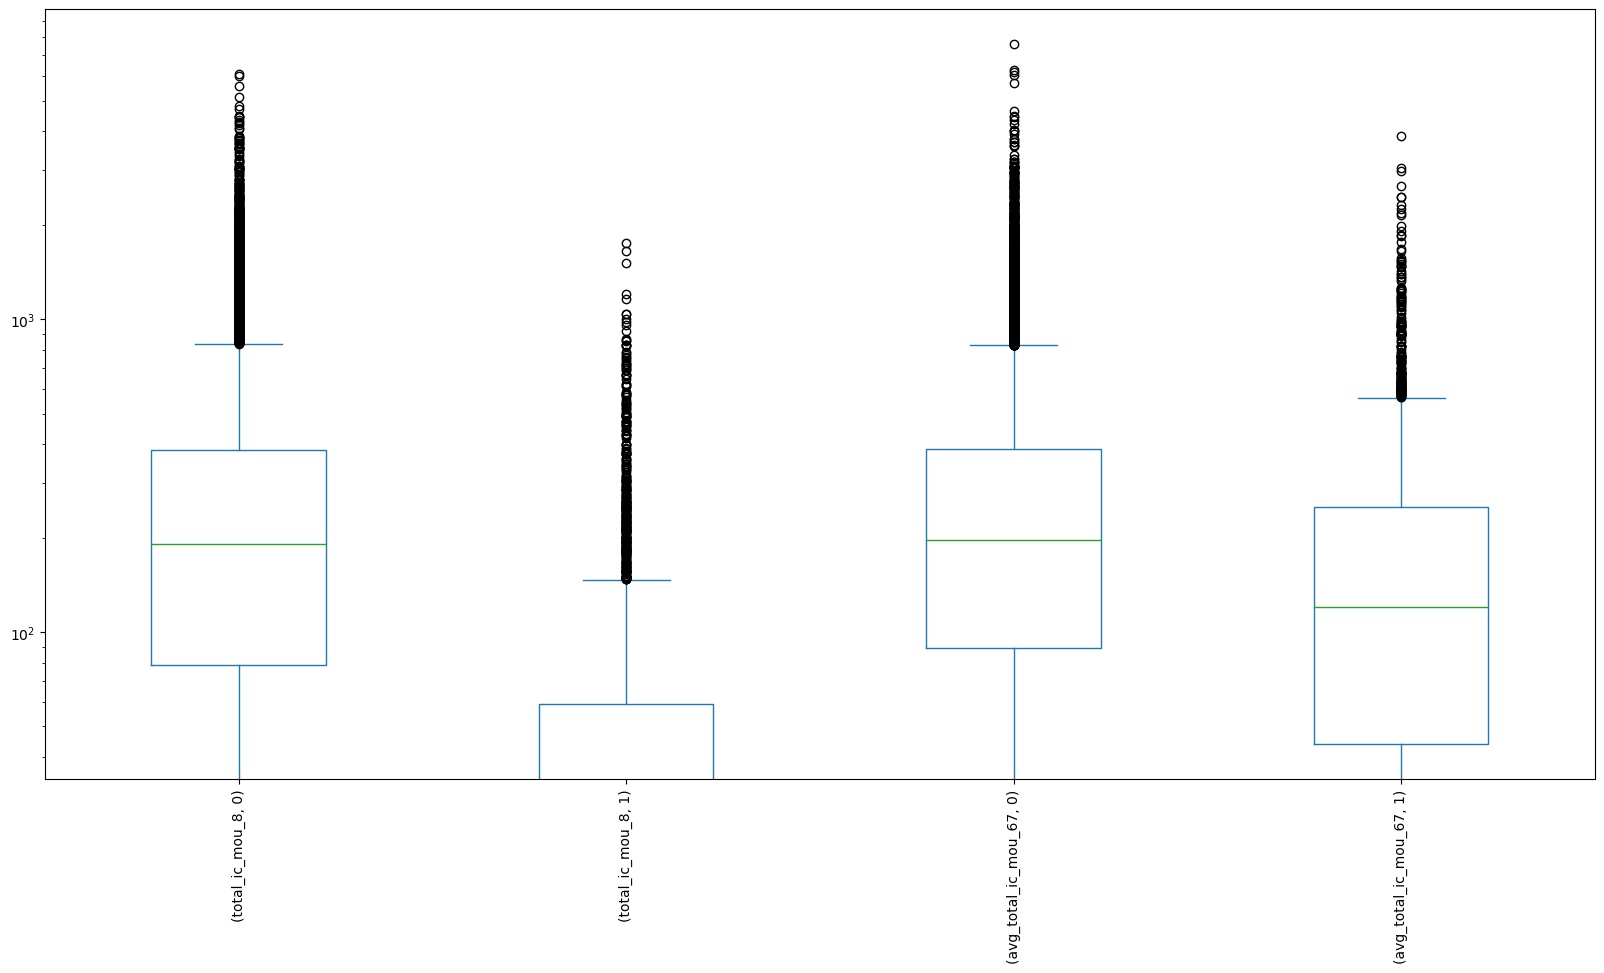

In [52]:
# plotting the distribution for incoming calls
col_ic = [col for col in df.columns if 'total_ic' in col]
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_ic].plot(kind = 'box',ax=ax)
ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

Incoming calls gradually decrease over the months for the churned customers

In [53]:
ic = [col for col in df.columns if 'ic' in col]
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[ic],25))

Top Absolute Correlations
loc_ic_mou_8           total_ic_mou_8           0.896248
avg_loc_ic_mou_67      avg_total_ic_mou_67      0.894035
loc_ic_t2m_mou_8       loc_ic_mou_8             0.848857
std_ic_t2m_mou_8       std_ic_mou_8             0.845857
avg_loc_ic_t2m_mou_67  avg_loc_ic_mou_67        0.843443
loc_ic_mou_8           avg_loc_ic_mou_67        0.824140
avg_std_ic_t2m_mou_67  avg_std_ic_mou_67        0.817633
total_ic_mou_8         avg_total_ic_mou_67      0.806181
loc_ic_t2m_mou_8       avg_loc_ic_t2m_mou_67    0.796036
loc_ic_t2t_mou_8       avg_loc_ic_t2t_mou_67    0.791551
loc_ic_t2f_mou_8       avg_loc_ic_t2f_mou_67    0.773733
loc_ic_t2m_mou_8       total_ic_mou_8           0.768828
avg_loc_ic_t2m_mou_67  avg_total_ic_mou_67      0.757034
std_ic_t2f_mou_8       avg_std_ic_t2f_mou_67    0.741901
ic_others_8            avg_ic_others_67         0.740908
std_ic_mou_8           avg_std_ic_mou_67        0.739996
loc_ic_mou_8           avg_total_ic_mou_67      0.739800
total

In [54]:
# Dropping columns with more than 75% correlation
df.drop(['loc_ic_mou_8','avg_loc_ic_mou_67','std_ic_t2m_mou_8','avg_std_ic_mou_67','avg_loc_ic_t2m_mou_67','avg_loc_ic_t2t_mou_67',
         'avg_loc_ic_t2f_mou_67'],axis=1,inplace=True)
df.shape

(29997, 73)

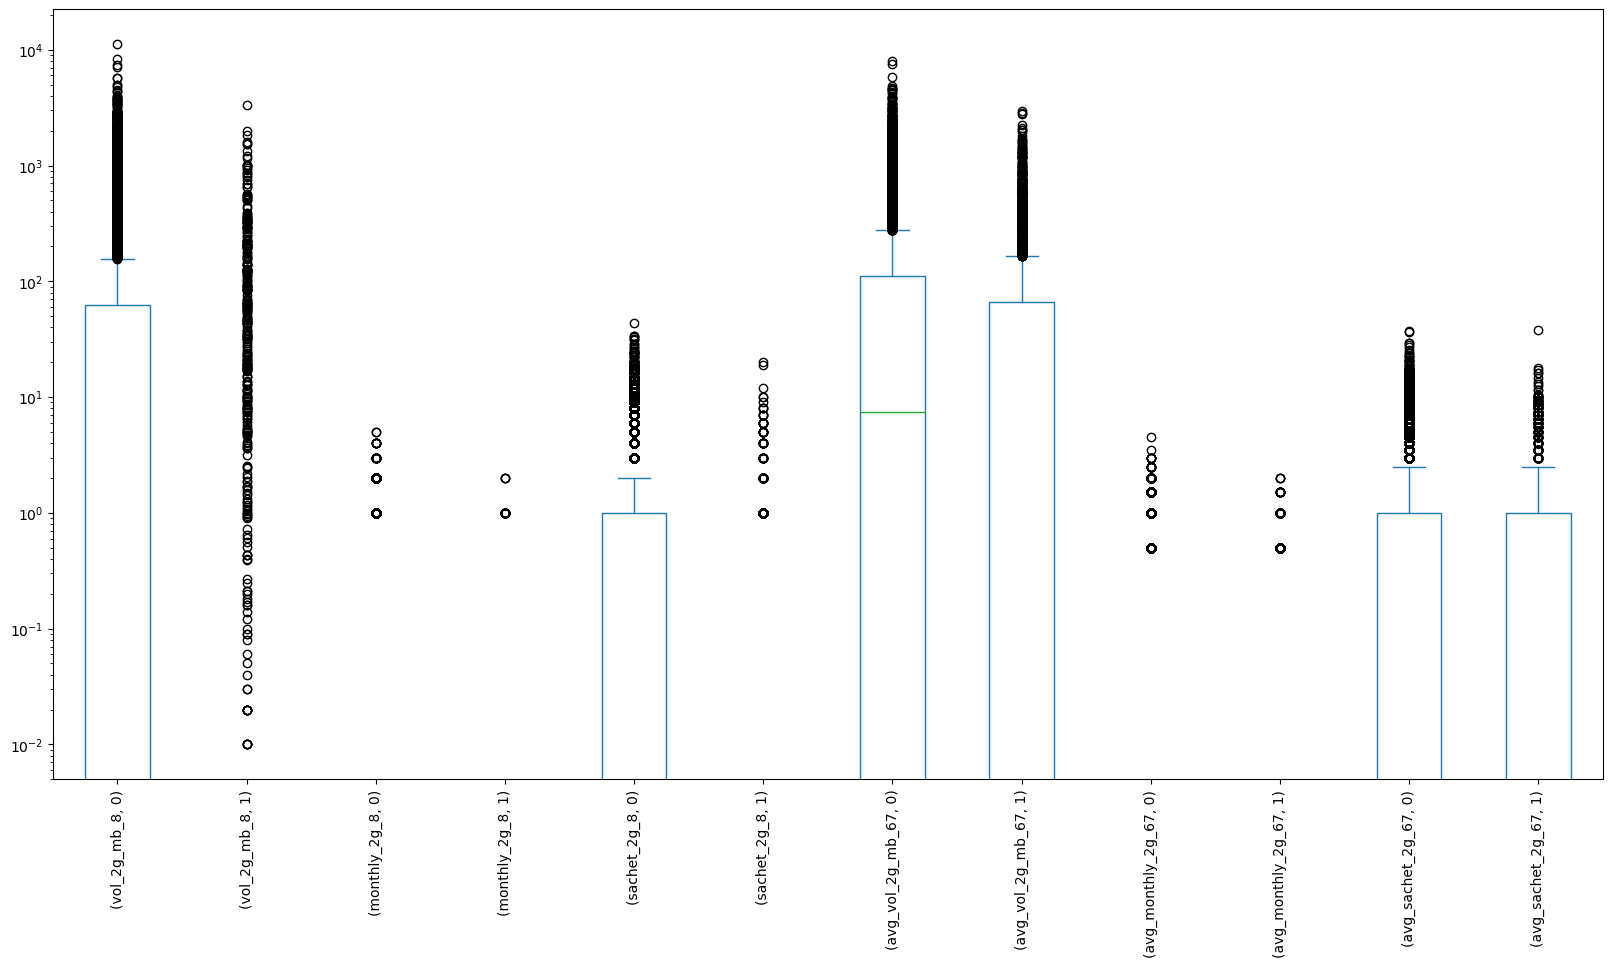

In [55]:
# plotting the distribution for  2g data
col_2g= [col for col in df.columns if '2g' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_2g].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')


Data usage decreases over the months for churned customers

In [56]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_2g],5))

Top Absolute Correlations
sachet_2g_8       avg_sachet_2g_67     0.716381
vol_2g_mb_8       avg_vol_2g_mb_67     0.652127
monthly_2g_8      avg_monthly_2g_67    0.604092
avg_vol_2g_mb_67  avg_monthly_2g_67    0.363790
vol_2g_mb_8       monthly_2g_8         0.313924
dtype: float64


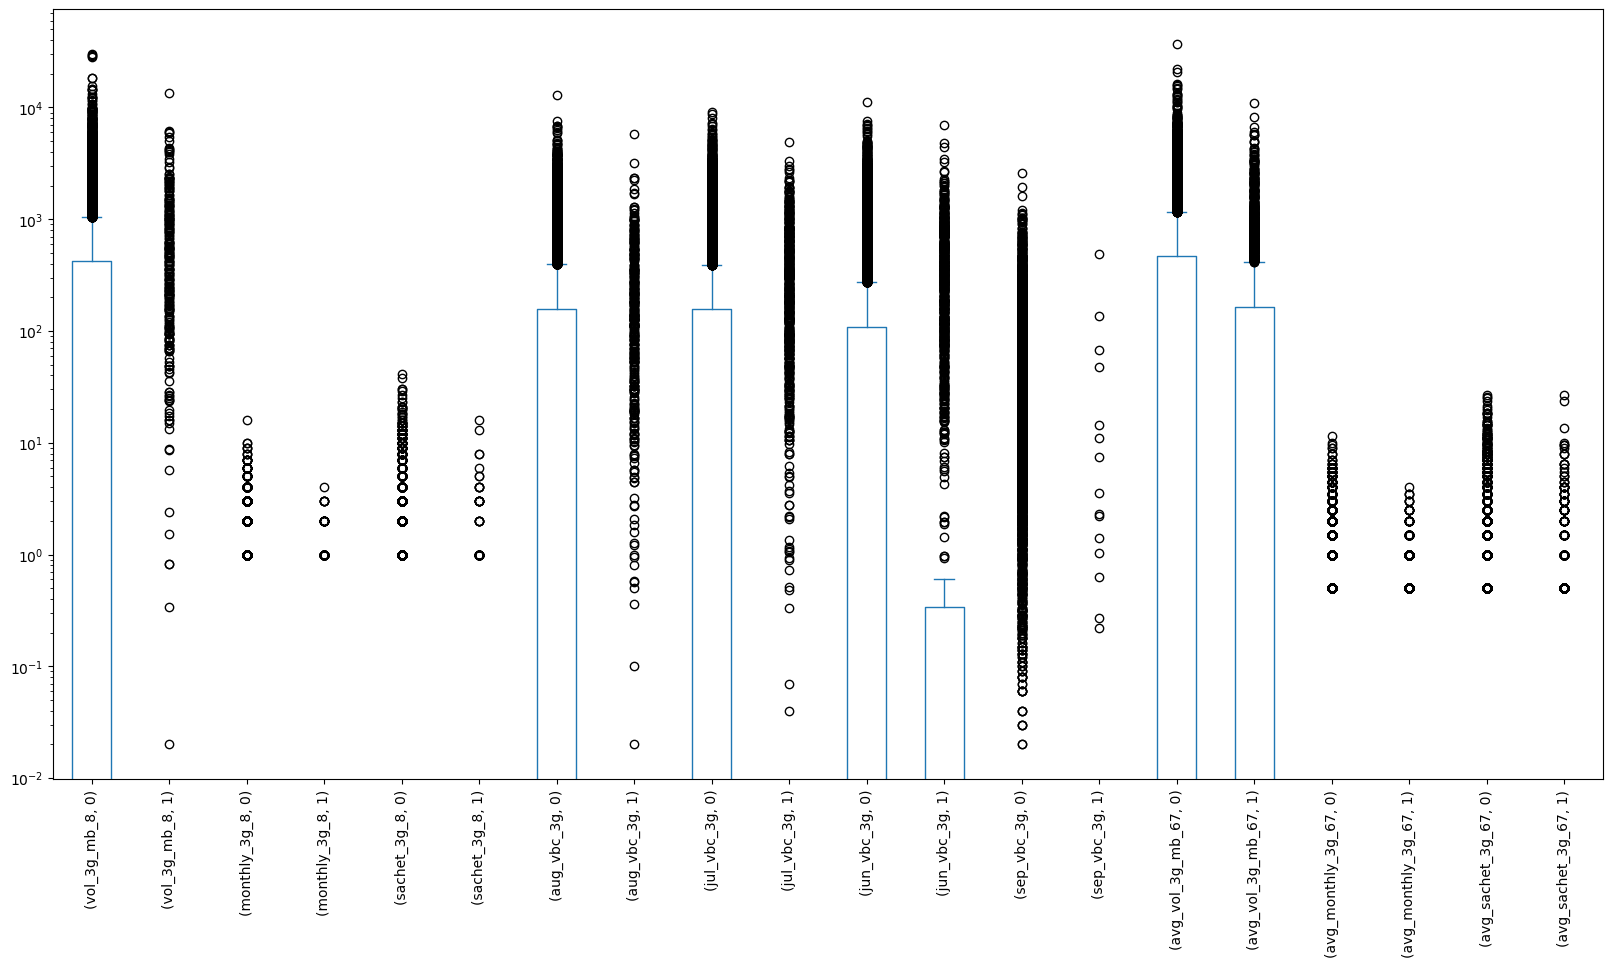

In [57]:
# plotting the distribution for  3g data
col_3g= [col for col in df.columns if '3g' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_3g].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

Data usage decreases over the months for churned customers

In [58]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_3g],5))

Top Absolute Correlations
vol_3g_mb_8   avg_vol_3g_mb_67     0.751147
aug_vbc_3g    jul_vbc_3g           0.697300
monthly_3g_8  avg_monthly_3g_67    0.684379
jul_vbc_3g    jun_vbc_3g           0.667317
sachet_3g_8   avg_sachet_3g_67     0.647242
dtype: float64


In [59]:
df.drop('avg_vol_3g_mb_67',axis=1,inplace=True)
df.shape

(29997, 72)

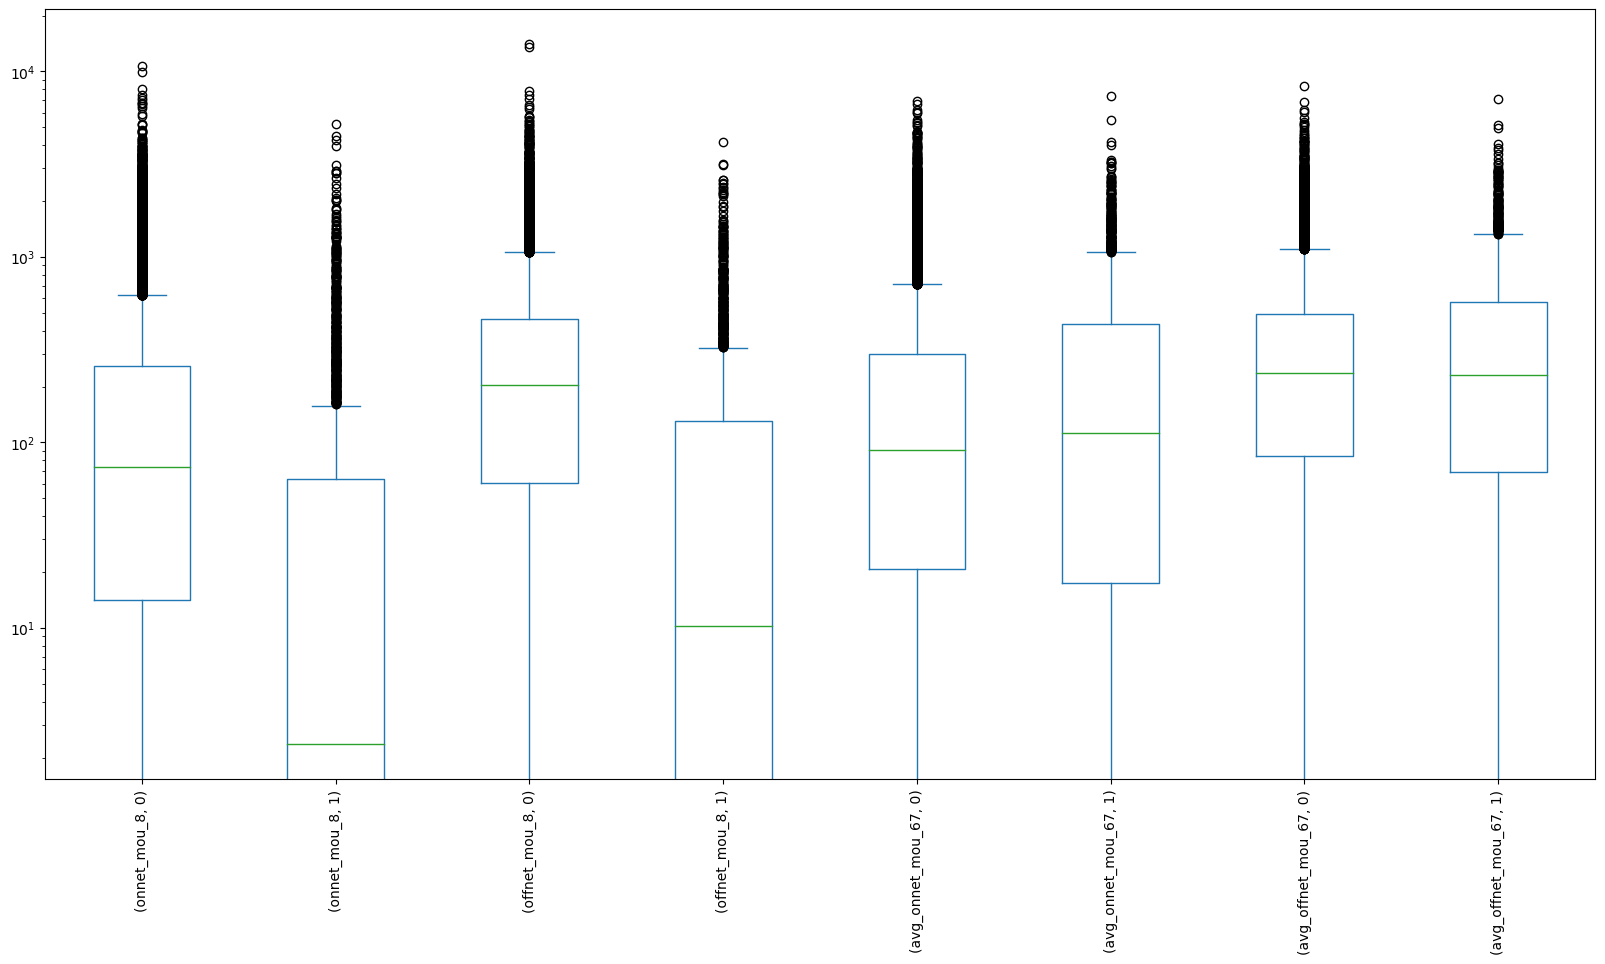

In [60]:
# plotting the distribution for onnet and offnet
col_on= [col for col in df.columns if 'net' in col]

fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df.pivot(columns='Churn')[col_on].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')

In [61]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[col_on],5))

Top Absolute Correlations
onnet_mou_8       avg_onnet_mou_67     0.764388
offnet_mou_8      avg_offnet_mou_67    0.722994
onnet_mou_8       offnet_mou_8         0.131502
                  avg_offnet_mou_67    0.083901
avg_onnet_mou_67  avg_offnet_mou_67    0.078037
dtype: float64


In [62]:
# Dropping columns with more than 75 % correlation
df.drop('avg_onnet_mou_67',axis=1,inplace=True)
df.shape

(29997, 71)

In [63]:
# Getting top correlation for entire dataframe
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[df.columns.tolist()[1:]], 20))

Top Absolute Correlations
arpu_8                   total_rech_amt_8         0.942449
avg_total_rech_data_67   avg_sachet_2g_67         0.905255
total_rech_data_8        sachet_2g_8              0.900628
onnet_mou_8              std_og_t2t_mou_8         0.860666
offnet_mou_8             std_og_t2m_mou_8         0.853837
avg_offnet_mou_67        avg_std_og_t2m_mou_67    0.841641
total_ic_mou_8           avg_total_ic_mou_67      0.806181
loc_ic_t2m_mou_8         total_ic_mou_8           0.768828
loc_og_t2t_mou_8         loc_og_mou_8             0.767340
offnet_mou_8             total_og_mou_8           0.754659
std_ic_t2f_mou_8         avg_std_ic_t2f_mou_67    0.741901
ic_others_8              avg_ic_others_67         0.740908
avg_offnet_mou_67        avg_total_og_mou_67      0.735232
onnet_mou_8              total_og_mou_8           0.732647
avg_av_rech_amt_data_67  avg_monthly_3g_67        0.728308
total_og_mou_8           avg_total_og_mou_67      0.725193
offnet_mou_8             avg_o

In [64]:
# Dropping columns with more than 75 % correlation
col_to_drop=['arpu_8','avg_sachet_2g_67','sachet_2g_8','std_og_t2t_mou_8','offnet_mou_8','avg_std_og_t2m_mou_67',
             'loc_og_t2t_mou_8']
df.drop(col_to_drop,axis=1,inplace=True)
df.shape

(29997, 64)

In [65]:
# Splitting the data into train and test
# Putting feature variable to X
X = df.drop('Churn',axis=1)

# Putting response variable to y
y = df['Churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
X_train.shape
cols=X_train.columns

In [66]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100, sampling_strategy=1.0)
X_smt, y_smt = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_smt)
y_train = pd.DataFrame(y_smt)
# rename the columns
X_train.columns =cols
y_train= y_train.rename(columns={ 0 : 'Churn'})
X_train.head()

,mobile_number,onnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,...,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_monthly_3g_67,avg_sachet_3g_67
0,7001454064.0,4.84,31.11,9.86,0.00,1.10,24.66,13.26,0.00,54.01,...,1.005,6.5,428.5,216.5,0.0,0.0,0.00,0.0,0.0,0.0
1,7001832271.0,148.59,0.00,0.00,20.99,0.00,324.64,0.00,0.00,0.00,...,0.000,4.0,301.0,251.0,1.0,203.0,425.80,0.5,0.5,0.0
2,7002244357.0,83.24,0.00,0.00,0.00,1.11,196.48,920.71,0.00,0.00,...,0.000,7.5,169.0,139.5,0.0,0.0,0.00,0.0,0.0,0.0
3,7000752154.0,697.44,22.81,23.56,18.96,2.38,1011.06,139.61,28.69,0.00,...,0.000,11.5,120.0,55.0,0.0,0.0,0.00,0.0,0.0,0.0
4,7000346259.0,23.89,0.00,0.00,3.58,0.00,93.68,0.00,0.00,0.00,...,0.565,17.0,154.0,15.0,1.0,154.0,36.46,1.0,0.0,0.0


In [67]:
 # Scaling
scaler = StandardScaler()  
X1=X_train.drop('mobile_number',axis=1)
XT1=X_test.drop('mobile_number',axis=1)
#X.head()
col=X1.columns.tolist()
X1[col] = scaler.fit_transform(X1[col]) # scaling
XT1[col]= scaler.transform(XT1[col])
XT1.head()

,onnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,...,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_monthly_3g_67,avg_sachet_3g_67
53991,-0.090923,-0.213515,-0.248152,0.453142,0.420555,0.937060,-0.233221,-0.122263,-0.081436,-0.057068,...,-0.096651,-0.927012,1.273793,-0.171682,-0.036693,0.743397,2.173172,4.239556,-0.396251,-0.228508
8279,-0.427854,-0.173232,-0.203654,-0.250009,0.226983,-0.499034,-0.352529,-0.122263,-0.081436,-0.127954,...,-0.096651,-0.119728,-0.951520,-0.740849,1.600105,-0.148910,0.460424,-0.414504,-0.396251,-0.228508
61559,-0.450486,-0.213515,-0.248152,-0.250009,1.046440,-0.465624,-0.352529,-0.122263,-0.081436,0.697867,...,-0.096651,-0.057629,-0.968771,-0.652929,1.804705,0.199698,-0.096634,-0.414504,-0.396251,-0.228508
49668,0.007732,0.816917,1.692152,-0.250009,-0.213395,-0.471249,-0.350559,-0.122263,-0.081436,-0.289220,...,-0.080318,0.687557,-0.527158,-0.060625,-0.445892,-0.168099,-0.438208,-0.414504,0.638323,-0.228508
93509,-0.421787,-0.046306,-0.185187,-0.146566,-0.213395,-0.457272,0.075717,-0.122263,-0.081436,-0.289220,...,-0.096651,-0.740716,0.583773,-0.717712,-0.650492,-0.734186,-0.438208,-0.414504,-0.396251,-0.228508


# **PCA**

In [68]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit(X1[col])

PCA(random_state=100)

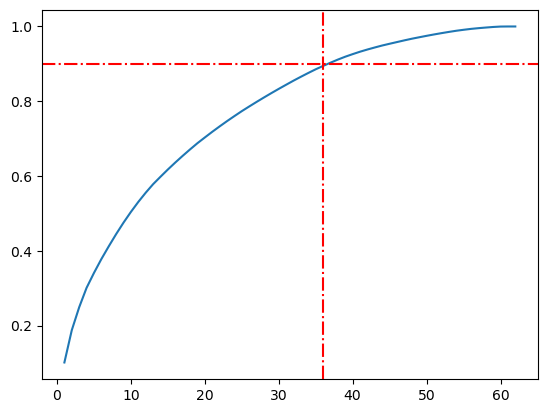

In [69]:
# Plotting the cumulative varoiance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.axhline(y=.90, color='r', linestyle='-.')
plt.axvline(x=36, color='r', linestyle='-.')

In [70]:
#PCA with 36 components can explain about 90 % of variance
pc = PCA(n_components=36, random_state=100) # Selecting 4 PCs for further analysis
newdata = pc.fit_transform(X1[col])
newdata.shape

(38554, 36)

In [71]:
df_train_pca = pd.DataFrame(newdata)  # Creating a dataframe of PCs
df_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.216085,-0.465314,-2.714845,0.260348,0.025794,-0.640969,-0.699302,2.664914,0.350313,1.271669,...,-0.072222,-0.419185,-0.324218,0.791636,-0.353695,0.486322,0.026174,0.698382,0.317334,0.069059
1,3.285677,0.794858,-1.534800,3.583386,-1.533981,-1.200931,0.490611,0.822433,-0.453909,-2.740319,...,0.564902,-0.450200,-0.112483,1.626593,0.187274,-0.217001,-0.864932,0.965086,-1.044434,1.334065
2,0.601653,-2.228243,-0.467863,-0.137446,-1.122566,0.197766,-0.169440,-0.545640,-0.434038,0.360374,...,-0.740898,-0.094889,0.108358,0.354618,-0.432139,0.004978,0.009811,-0.105851,-0.016516,0.059245
3,5.233012,-4.563550,-0.046920,5.414802,0.678303,-0.325471,-0.990779,0.237860,-1.027192,-3.468437,...,3.711106,-2.769451,-2.168407,3.280448,-0.475681,0.692984,-0.434746,-0.884480,1.078659,-0.919022
4,0.440129,1.020711,-0.103497,2.472449,-0.802079,-1.386328,0.558580,-0.618374,1.590784,-0.475812,...,0.432171,0.395022,-1.261985,-0.266247,0.650127,0.341960,0.149173,0.343276,0.231027,-0.384251


In [72]:
df_train_pca.shape

(38554, 36)

In [73]:
test_data = pc.transform(XT1[col])
df_test_pca = pd.DataFrame(test_data)
df_test_pca.shape

(9000, 36)

In [74]:
df_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,5.101354,-0.573987,-0.273786,7.213559,5.221254,-0.563442,3.100623,-5.023096,2.198103,-0.099279,...,-0.666049,0.696584,0.634626,-1.211016,0.530977,-0.319765,0.330066,-0.867293,-0.601442,0.908033
1,-2.426740,1.199306,1.831695,0.458017,0.466785,-0.558505,1.177094,0.797746,-0.876200,-0.219322,...,-0.244334,-0.564884,0.136061,0.473181,0.915416,-1.171793,-0.644939,0.891780,-0.668914,-0.238683
2,-0.602782,2.743593,3.417415,0.153472,0.465010,-0.998526,-0.284112,0.123940,-0.857763,-0.403076,...,1.005795,0.973073,0.875548,0.191821,0.003796,1.312643,-0.661737,0.638086,-1.020541,-2.635959
3,-1.313674,-1.157556,0.206834,-1.314457,0.318011,0.971438,0.095323,0.628799,0.909066,0.073013,...,-2.014765,-0.195126,0.440970,1.888115,-1.432447,0.936357,0.637946,-0.151045,-0.810904,-0.502081
4,-2.190184,-0.584205,-0.913328,0.052743,-0.224081,0.782466,-0.339578,-0.258500,-0.234054,0.229601,...,0.234511,-0.340524,0.404619,0.032990,0.190046,0.082107,0.189204,-0.361453,-0.175864,-0.269695


# **Model Building**

## **Random Forest with PCA**

Grid Search to Find Optimal Hyperparameters

In [75]:
# GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold

# Create parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12,15],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'n_estimators': [100,150,200], 
    'max_features': [3,5, 8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)


**Fitting the final model with the best parameters obtained from grid search.**

In [76]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=8,
                             n_estimators=100)

In [77]:
# fit
# fit
rfc.fit(df_train_pca, y_train)
# predict
predictions = rfc.predict(df_test_pca)
y_pred = rfc.predict_proba(df_test_pca)

In [78]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
#print(classification_report(y_test,predictions))
#print(confusion_matrix(y_test,predictions))
conf = metrics.confusion_matrix(y_test, predictions )
conf

array([[7323,  956],
       [ 175,  546]], dtype=int64)

In [79]:
TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives
FN = conf[1,0] # false negatives
# Printing other performance meterics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.7572815533980582
Specificity                          =  0.884527116801546
false positive rate                  =  0.11547288319845392
Positive predictive value/Precision  =  0.36351531291611183
Negative predictive value            =  0.9766604427847426


In [80]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 89.06%


# **Logistic Regression with PCA**

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Building Logistic Model
X1_train_sm = stm.add_constant(df_train_pca)
log_m1 = stm.GLM(y_train,X1_train_sm, family = stm.families.Binomial())
res1 = log_m1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38554
Model:                            GLM   Df Residuals:                    38517
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14664.
Date:                Tue, 09 May 2023   Deviance:                       29328.
Time:                        10:32:04   Pearson chi2:                 1.17e+11
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4651
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5146      0.022    -23.067      0.000      -0.558      -0.471
0             -0.8889      0.013    -69.364      0.000      -0.914      -0.864
1             -0.1208      0.010    -12.085      0.000      -0.140      -0.101
2             -0.4778      0.015    -32.216      0.000      -0.507      -0.449
3             -0.5381      0.013    -41.614      0.000      -0.563      -0.513
4              0.3670      0.013     27.788      0.000       0.341       0.393
5              0.5296      0.015     36.477      0.000       0.501       0.558
6              0.1026      0.013      7.939      0.000       0.077       0.128
7              0.2996      0.021     14.228      0.000       0.258       0.341
8              0.0463      0.015      3.092      0.002       0.017       0.076
9              0.1736      0.019      9.183      0.000       0.137       0.211
10             0.1254      0.017      7.572      0.000       0.093       0.158
11            -0.8224      0.026    -31.185      0.000      -0.874      -0.771
12             0.2045      0.024      8.469      0.000       0.157       0.252
13            -0.0758      0.020     -3.824      0.000      -0.115      -0.037
14             0.6214      0.027     23.435      0.000       0.569       0.673
15            -0.9055      0.111     -8.137      0.000      -1.124      -0.687
16            -1.3091      0.115    -11.421      0.000      -1.534      -1.084
17            -1.7839      0.230     -7.749      0.000      -2.235      -1.333
18            -0.4297      0.097     -4.408      0.000      -0.621      -0.239
19            -1.3855      0.127    -10.945      0.000      -1.634      -1.137
20            -1.0765      0.191     -5.625      0.000      -1.452      -0.701
21            -0.8659      0.079    -10.990      0.000      -1.020      -0.711
22             0.9700      0.113      8.568      0.000       0.748       1.192
23            -0.3739      0.047     -7.960      0.000      -0.466      -0.282
24             0.3186      0.052      6.116      0.000       0.216       0.421
25            -0.1451      0.043     -3.357      0.001      -0.230      -0.060
26             0.1895      0.033      5.695      0.000       0.124       0.255
27             0.0726      0.029      2.540      0.011       0.017       0.129
28             0.4508      0.052      8.652      0.000       0.349       0.553
29             0.4597      0.044     10.470      0.000       0.374       0.546
30             0.1285      0.044      2.898      0.004       0.042       0.215
31             0.2512      0.026      9.731      0.000       0.201       0.302
32             0.1685      0.030      5.649      0.000       0.110       0.227
33            -0.2463      0.025     -9.859      0.000      -0.295      -0.197
34             0.3378      0.024     13.846      0.000       0.290       0.386
35

In [82]:
y_train_pred = res1.predict(X1_train_sm).values.reshape(-1)

In [83]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churned':y_smt, 'Churn_Prob':y_train_pred})
y_train_pred_final['ind']=y_train_pred_final.index
y_train_pred_final.head()


,Churned,Churn_Prob,ind
0,0,0.741822,0
1,0,0.010311,1
2,0,0.154991,2
3,0,0.007252,3
4,0,0.060583,4


In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,ind,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.741822,0,1,1,1,1,1,1,1,1,0,0
1,0,0.010311,1,1,0,0,0,0,0,0,0,0,0
2,0,0.154991,2,1,1,0,0,0,0,0,0,0,0
3,0,0.007252,3,1,0,0,0,0,0,0,0,0,0
4,0,0.060583,4,1,0,0,0,0,0,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.717357  0.980547  0.454168
0.2   0.2  0.779271  0.958655  0.599886
0.3   0.3  0.813249  0.933807  0.692691
0.4   0.4  0.834336  0.904186  0.764486
0.5   0.5  0.846345  0.867977  0.824713
0.6   0.6  0.845645  0.816673  0.874617
0.7   0.7  0.827774  0.744410  0.911138
0.8   0.8  0.780801  0.617627  0.943975
0.9   0.9  0.652799  0.329252  0.976345


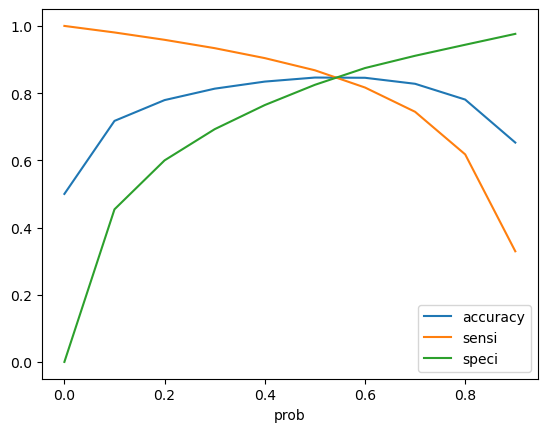

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [87]:
# Creating new column 'predicted' with 1 if conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x >= 0.5 else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,ind,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.741822,0,1,1,1,1,1,1,1,1,0,0,1
1,0,0.010311,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.154991,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.007252,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.060583,4,1,0,0,0,0,0,0,0,0,0,0


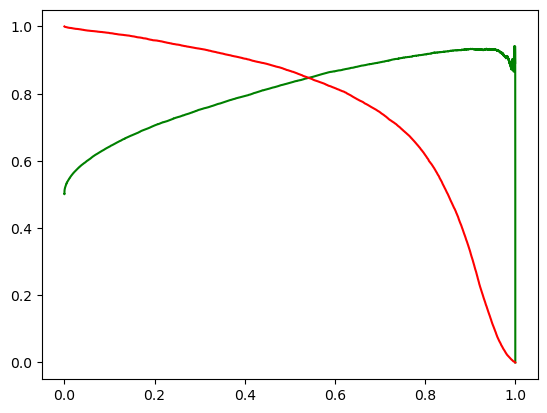

In [88]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Churned, y_train_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **Evaluating model performance**

In [89]:
# Overall accuracy.
print("Accuracy is: ",metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

Accuracy is:  0.8463453856927945
[[15898  3379]
 [ 2545 16732]]


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Printing other performance meterics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('False positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.8679773823727759
Specificity                          =  0.8247133890128132
False positive rate                  =  0.17528661098718681
Positive predictive value/Precision  =  0.8319824971408681
Negative predictive value            =  0.862007265629236


In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

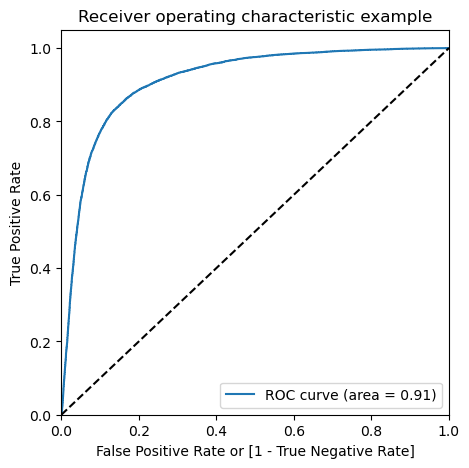

In [92]:
#  Finding the ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

In [93]:
X_test_sm = stm.add_constant(df_test_pca)
#Making predictions on the test set
y_test_pred = res1.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,0.000901
1,0.391430
2,0.006097
3,0.981229
4,0.856633


In [94]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,53991,0.000901
1,1,8279,0.391430
2,0,61559,0.006097
3,1,49668,0.981229
4,1,93509,0.856633


In [95]:
# Final prediction
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,53991,0.000901,0
1,1,8279,0.391430,0
2,0,61559,0.006097,0
3,1,49668,0.981229,1
4,1,93509,0.856633,1


In [96]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.8312222222222222

In [97]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[6884, 1395],
       [ 124,  597]], dtype=int64)

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Printing other performance meterics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.8280166435506241
Specificity                          =  0.8315013890566494
false positive rate                  =  0.16849861094335064
Positive predictive value/Precision  =  0.2996987951807229
Negative predictive value            =  0.9823059360730594


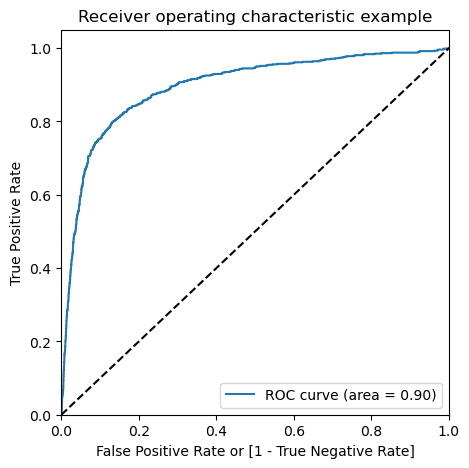

In [99]:
# A very low precision is observed for test set
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

# **Logistic Regression using RFE**

In [100]:
# initial model with all features

X_train_sm = stm.add_constant(X1)
log_m = stm.GLM(y_train,X_train_sm, family = stm.families.Binomial())
res = log_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38554
Model:                            GLM   Df Residuals:                    38491
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13208.
Date:                Tue, 09 May 2023   Deviance:                       26417.
Time:                        10:32:06   Pearson chi2:                 7.40e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5040
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5638      0.025    -22.986      0.000      -0.612      -0.516
onnet_mou_8                 0.5390      0.100      5.403      0.000       0.343       0.735
roam_ic_mou_8               0.0079      0.023      0.338      0.735      -0.038       0.054
roam_og_mou_8              -0.0242      0.030     -0.807      0.420      -0.083       0.035
loc_og_t2f_mou_8           -0.0121      0.023     -0.521      0.602      -0.058       0.033
loc_og_t2c_mou_8            0.1294      0.021      6.110      0.000       0.088       0.171
loc_og_mou_8               -0.1860      0.052     -3.598      0.000      -0.287      -0.085
std_og_t2m_mou_8            0.4586      0.087      5.264      0.000       0.288       0.629
std_og_t2f_mou_8            0.0096      0.020      0.491      0.623      -0.029       0.048
isd_og_mou_8                0.0110      0.018      0.622      0.534      -0.024       0.046
spl_og_mou_8               -0.0168      0.028     -0.606      0.544      -0.071       0.037
og_others_8                -0.6814      0.268     -2.543      0.011      -1.207      -0.156
total_og_mou_8             -1.4587      0.158     -9.243      0.000      -1.768      -1.149
loc_ic_t2t_mou_8         7416.1219    254.310     29.162      0.000    6917.684    7914.559
loc_ic_t2m_mou_8         1.067e+04    365.839     29.162      0.000    9951.708    1.14e+04
loc_ic_t2f_mou_8         2036.1332     69.820     29.163      0.000    1899.288    2172.978
std_ic_t2t_mou_8           -0.2666      0.051     -5.271      0.000      -0.366      -0.167
std_ic_t2f_mou_8           -0.0647      0.039     -1.661      0.097      -0.141       0.012
std_ic_mou_8             6658.0798    228.300     29.164      0.000    6210.620    7105.539
total_ic_mou_8          -1.809e+04    620.337    -29.165      0.000   -1.93e+04   -1.69e+04
spl_ic_mou_8                5.7863      0.210     27.516      0.000       5.374       6.198
isd_ic_mou_8             3101.0763    106.331     29.164      0.000    2892.672    3309.480
ic_others_8               575.9981     19.746     29.170      0.000     537.296     614.700
total_rech_num_8           -0.8012      0.039    -20.420      0.000      -0.878      -0.724
total_rech_amt_8            0.3959      0.054      7.321      0.000       0.290       0.502
max_rech_amt_8              0.0498      0.031      1.588      0.112      -0.012       0.111
last_day_rch_amt_8         -0.5407      0.026    -20.521      0.000      -0.592      -0.489
total_rech_data_8          -0.3337      0.034     -9.835      0.000      -0.400      -0.267
vol_2g_mb_8                -0.1188      0.031     -3.876      0.000      -0.179      -0.059
vol_3g_mb_8                 0.3384      0.034      9.937      0.000       0.272       0.405
monthly_2g_8               -1.0079      0.043  

In [101]:
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=20)
rfe = rfe.fit(X1, y_train)
# Checking the attribute names after RFE
rfe_cols = X1.columns[rfe.support_]
rfe_cols

Index(['onnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'sep_vbc_3g', 'avg_total_og_mou_67',
       'avg_total_ic_mou_67', 'avg_total_rech_num_67', 'avg_sachet_3g_67'],
      dtype='object')

In [102]:
X1_train_sm = stm.add_constant(X1[rfe_cols])
log_m1 = stm.GLM(y_train,X1_train_sm, family = stm.families.Binomial())
res1 = log_m1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38554
Model:                            GLM   Df Residuals:                    38533
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14245.
Date:                Tue, 09 May 2023   Deviance:                       28490.
Time:                        10:32:16   Pearson chi2:                 8.57e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4766
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6567      0.024    -27.941      0.000      -0.703      -0.611
onnet_mou_8               0.8877      0.061     14.604      0.000       0.769       1.007
std_og_t2m_mou_8          0.7719      0.055     13.908      0.000       0.663       0.881
og_others_8              -0.4482      0.185     -2.419      0.016      -0.811      -0.085
total_og_mou_8           -2.2177      0.097    -22.894      0.000      -2.408      -2.028
loc_ic_t2t_mou_8         -0.5564      0.056     -9.913      0.000      -0.666      -0.446
loc_ic_t2m_mou_8         -0.4870      0.057     -8.489      0.000      -0.599      -0.375
total_ic_mou_8           -1.0724      0.069    -15.630      0.000      -1.207      -0.938
spl_ic_mou_8             -0.3041      0.024    -12.484      0.000      -0.352      -0.256
total_rech_num_8         -1.0203      0.036    -28.225      0.000      -1.091      -0.949
total_rech_amt_8          0.6273      0.031     20.080      0.000       0.566       0.689
last_day_rch_amt_8       -0.4802      0.023    -20.873      0.000      -0.525      -0.435
total_rech_data_8        -0.4423      0.026    -16.945      0.000      -0.493      -0.391
monthly_2g_8             -1.0213      0.038    -27.019      0.000      -1.095      -0.947
monthly_3g_8             -0.8311      0.030    -27.415      0.000      -0.891      -0.772
sachet_3g_8              -0.5933      0.048    -12.290      0.000      -0.688      -0.499
sep_vbc_3g               -1.4937      0.119    -12.574      0.000      -1.727      -1.261
avg_total_og_mou_67       0.3665      0.027     13.596      0.000       0.314       0.419
avg_total_ic_mou_67       0.6322      0.035     17.810      0.000       0.563       0.702
avg_total_rech_num_67     0.4178      0.027     15.505      0.000       0.365       0.471
avg_sachet_3g_67          0.3762      0.029     12.936      0.000       0.319       0.433
=========================================================================================
"""

In [103]:
y_train_pred = res1.predict(X1_train_sm).values.reshape(-1)
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churned':y_smt, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train_pred_final.index
y_train_pred_final.head()

,Churned,Churn_Prob,CustID
0,0,0.604690,0
1,0,0.003085,1
2,0,0.190994,2
3,0,0.000042,3
4,0,0.012358,4


In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.604690,0,1,1,1,1,1,1,1,0,0,0
1,0,0.003085,1,1,0,0,0,0,0,0,0,0,0
2,0,0.190994,2,1,1,0,0,0,0,0,0,0,0
3,0,0.000042,3,1,0,0,0,0,0,0,0,0,0
4,0,0.012358,4,1,0,0,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.733361  0.979613  0.487109
0.2   0.2  0.783447  0.958967  0.607927
0.3   0.3  0.815168  0.935571  0.694766
0.4   0.4  0.838253  0.911345  0.765161
0.5   0.5  0.851663  0.879079  0.824247
0.6   0.6  0.853841  0.837112  0.870571
0.7   0.7  0.837475  0.765472  0.909478
0.8   0.8  0.788738  0.629299  0.948177
0.9   0.9  0.651606  0.324999  0.978212


<AxesSubplot:xlabel='prob'>

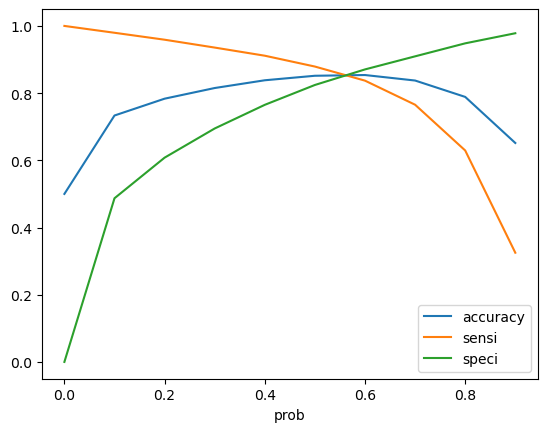

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [107]:
# Creating new column 'predicted' with 1 if conversion_Prob > 0.6 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x >= 0.5 else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.604690,0,1,1,1,1,1,1,1,0,0,0,1
1,0,0.003085,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.190994,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.000042,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.012358,4,1,0,0,0,0,0,0,0,0,0,0


## **Evaluating the preformance of the model**

In [108]:
# Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

0.8516626031021425
[[15889  3388]
 [ 2331 16946]]


In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Printing other performance meterics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.8790786948176583
Specificity                          =  0.8242465113866265
false positive rate                  =  0.17575348861337345
Positive predictive value/Precision  =  0.8333825120487853
Negative predictive value            =  0.8720636663007684


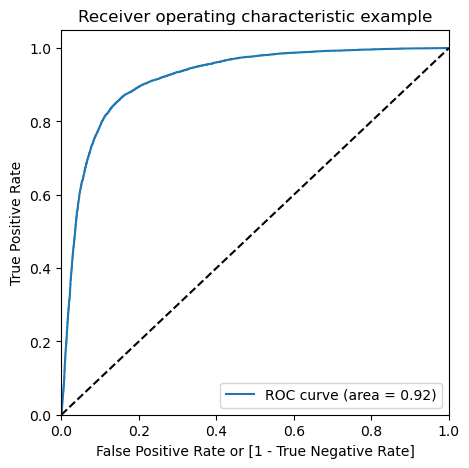

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

### **Prediction on Test Data**

In [111]:
X_test_sm = stm.add_constant(XT1[rfe_cols])
#Making predictions on the test set
y_test_pred = res1.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
53991,0.000117
8279,0.439638
61559,0.017625
49668,0.973906
93509,0.811651


In [112]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,53991,0.000117
1,1,8279,0.439638
2,0,61559,0.017625
3,1,49668,0.973906
4,1,93509,0.811651


In [113]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,53991,0.000117,0
1,1,8279,0.439638,0
2,0,61559,0.017625,0
3,1,49668,0.973906,1
4,1,93509,0.811651,1


In [114]:
# Overall accuracy.
print(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
print(confusion)

0.8286666666666667
[[6866 1413]
 [ 129  592]]


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Printing other performance meterics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.8210818307905686
Specificity                          =  0.8293272134315739
false positive rate                  =  0.17067278656842613
Positive predictive value/Precision  =  0.29526184538653366
Negative predictive value            =  0.9815582558970694


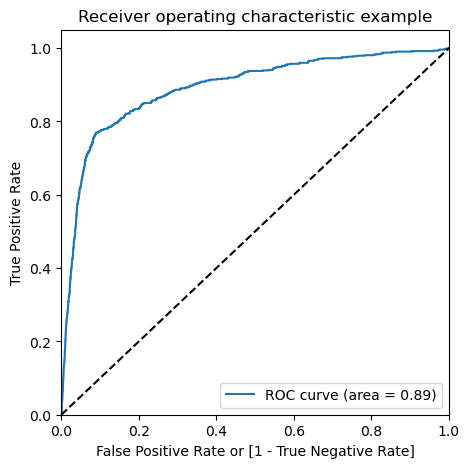

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

In [117]:
# Important features
rfe_cols

Index(['onnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'sep_vbc_3g', 'avg_total_og_mou_67',
       'avg_total_ic_mou_67', 'avg_total_rech_num_67', 'avg_sachet_3g_67'],
      dtype='object')

# **XGBoost with PCA**

In [120]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(df_train_pca, y_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [121]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(df_test_pca)
y_pred[:10]

array([[8.5800159e-01, 1.4199843e-01],
       [9.9405235e-01, 5.9476541e-03],
       [9.9984390e-01, 1.5608144e-04],
       [1.0618657e-01, 8.9381343e-01],
       [2.4433678e-01, 7.5566322e-01],
       [9.9234259e-01, 7.6573952e-03],
       [9.9639589e-01, 3.6041355e-03],
       [4.9961549e-01, 5.0038451e-01],
       [9.1408437e-01, 8.5915633e-02],
       [9.4503760e-01, 5.4962385e-02]], dtype=float32)

In [122]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 87.97%


In [123]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)     

In [124]:
# Fit the grid search to the data
# commented as it takes long time
#grid_search.fit(df_train_pca, y_train) 
# fit the model
model_cv.fit(df_train_pca, y_train)   

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, 

In [125]:
# printing the optimal accuracy score and hyperparameters
#print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.503137,0.827036,0.034036,0.002333,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.927232,0.940665,0.937040,0.934979,0.005674,4,0.948887,0.942651,0.944818,0.945452,0.002585
1,5.557259,0.283205,0.028261,0.002141,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.927820,0.941471,0.938289,0.935860,0.005831,3,0.949680,0.944016,0.946119,0.946605,0.002338
2,6.664248,0.139645,0.039308,0.007005,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.927489,0.940353,0.937083,0.934975,0.005459,5,0.950235,0.943477,0.945293,0.946335,0.002856
3,5.614129,0.813229,0.041603,0.009094,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.928257,0.938218,0.935727,0.934067,0.004233,6,0.958413,0.952511,0.954313,0.955079,0.002470
4,5.794979,0.229807,0.024498,0.005985,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.933724,0.945346,0.941461,0.940177,0.004831,2,0.964657,0.960298,0.962214,0.962390,0.001784
5,7.117123,0.232761,0.030193,0.001520,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.935693,0.948241,0.944329,0.942754,0.005242,1,0.967036,0.961692,0.963626,0.964118,0.002209


In [126]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.503137,0.827036,0.034036,0.002333,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.927232,0.940665,0.937040,0.934979,0.005674,4,0.948887,0.942651,0.944818,0.945452,0.002585
1,5.557259,0.283205,0.028261,0.002141,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.927820,0.941471,0.938289,0.935860,0.005831,3,0.949680,0.944016,0.946119,0.946605,0.002338
2,6.664248,0.139645,0.039308,0.007005,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.927489,0.940353,0.937083,0.934975,0.005459,5,0.950235,0.943477,0.945293,0.946335,0.002856
3,5.614129,0.813229,0.041603,0.009094,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.928257,0.938218,0.935727,0.934067,0.004233,6,0.958413,0.952511,0.954313,0.955079,0.002470
4,5.794979,0.229807,0.024498,0.005985,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.933724,0.945346,0.941461,0.940177,0.004831,2,0.964657,0.960298,0.962214,0.962390,0.001784


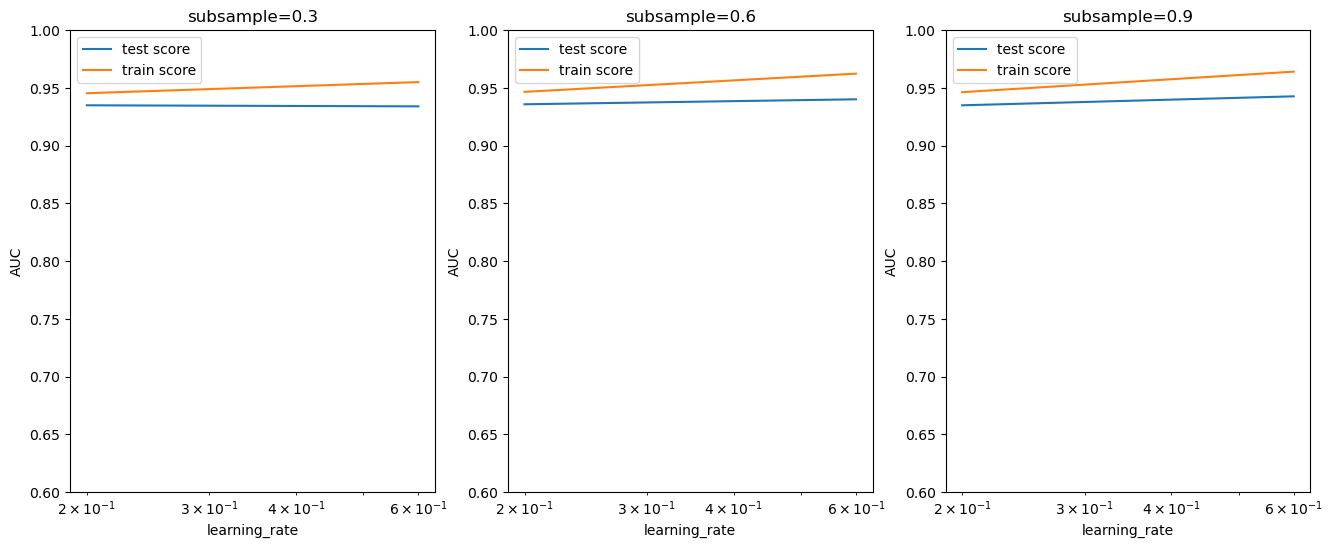

In [127]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [128]:
#### haven't chosen the optimum
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(df_train_pca, y_train)

[10:37:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor=None, ...)

In [129]:
# predict
y_pred = model.predict_proba(df_test_pca)
y_pred[:10]


array([[8.5800159e-01, 1.4199843e-01],
       [9.9405235e-01, 5.9476541e-03],
       [9.9984390e-01, 1.5608144e-04],
       [1.0618657e-01, 8.9381343e-01],
       [2.4433678e-01, 7.5566322e-01],
       [9.9234259e-01, 7.6573952e-03],
       [9.9639589e-01, 3.6041355e-03],
       [4.9961549e-01, 5.0038451e-01],
       [9.1408437e-01, 8.5915633e-02],
       [9.4503760e-01, 5.4962385e-02]], dtype=float32)

In [130]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.8797487217211002

In [131]:
# feature importance
importance = dict(zip(df_train_pca.columns, model.feature_importances_))
importance

{0: 0.18261494,
 1: 0.021385703,
 2: 0.038978335,
 3: 0.049729466,
 4: 0.044233944,
 5: 0.073057495,
 6: 0.025404034,
 7: 0.029308036,
 8: 0.016490823,
 9: 0.018092444,
 10: 0.027107159,
 11: 0.05445272,
 12: 0.036362335,
 13: 0.018519549,
 14: 0.029175775,
 15: 0.019023407,
 16: 0.025952734,
 17: 0.017471213,
 18: 0.018963687,
 19: 0.0146760745,
 20: 0.013306486,
 21: 0.011721855,
 22: 0.012737507,
 23: 0.014350972,
 24: 0.014204473,
 25: 0.016160429,
 26: 0.013275694,
 27: 0.014823044,
 28: 0.017562797,
 29: 0.017047666,
 30: 0.014946849,
 31: 0.01662317,
 32: 0.01539278,
 33: 0.014955647,
 34: 0.013604769,
 35: 0.01828596}

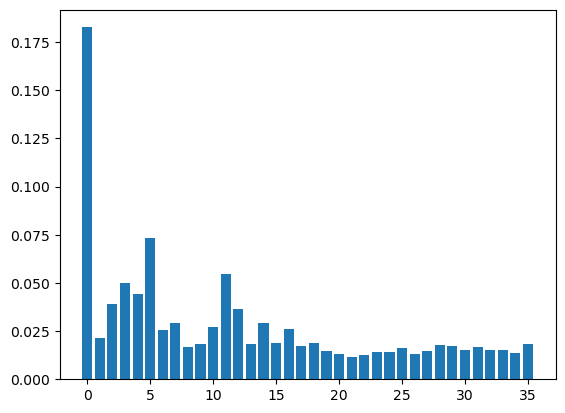

In [132]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [133]:
y_pred_fin = model.predict(df_test_pca)

conf = metrics.confusion_matrix(y_test, y_pred_fin )
conf

array([[7524,  755],
       [ 235,  486]], dtype=int64)

In [134]:
TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives
FN = conf[1,0] # false negatives
# Printing other performance meterics
print('Sensitivity/ Recall                  = ', TP / float(TP+FN))
print('Specificity                          = ',TN / float(TN+FP))
print('false positive rate                  = ',FP/ float(TN+FP))
print ('Positive predictive value/Precision  = ',TP / float(TP+FP))
print ('Negative predictive value            = ', TN / float(TN+FN))

Sensitivity/ Recall                  =  0.6740638002773925
Specificity                          =  0.9088054112815558
false positive rate                  =  0.09119458871844426
Positive predictive value/Precision  =  0.39161966156325545
Negative predictive value            =  0.969712591828844


# **Model Results**

Model Accuracy is better along with Sensitivity and Specificity while using Logic Regression along with PCA. Model which is built with probablity of 0.6 or greater yielded Better results.

Area under the curve also resulted in 0.92

# **Important Predictive variables which decide Churn are as follows:**

1.total_og_mou_8

2.sep_vbc_3g

3.onnet_mou_8

4.loc_ic_t2m_mou_8

5.std_og_t2m_mou_8

6.avg_total_ic_mou_67

7.loc_ic_t2t_mou_8

8.og_others_8

# **Recommended Strategy**

Based on the above variables, reduced usage of the mobile either for call or data is a clear indication of churn.

Hence on any month, if the usage of customer reduces or go below the average usage in previous month, then we do the following:

1.Roll out offers to retain them

2.Assign a dedicated customer service specialist to understand the reason for leaving and bring the issue to closure in case of any pending problems reported by customer.